# Tugas Besar IF2220 Probabilitas dan Statistika - Penarikan Kesimpulan dan Pengujian Hipotesis
___
### Tujuan Pengerjaan
Tujuan pengerjaan tugas ini adalah untuk melakukan analisis statistik terhadap data anggur.csv dan melakukan pengujian hipotesis terhadap data tersebut.

### Penulis
| Nama                      | NIM      |
| :----------------------- | :------- |
| Nicholas Liem             | 13521135 |
| Nathania Calista Djunaedi | 13521139 |

### Dependencies
   * testing

In [1]:
# Gambaran anggur.csv
data_anggur <- read.csv("../data/anggur.csv")
head(data_anggur)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.90,0.4451,0.1813,2.049401,0.07057449,16.593818,42.27,0.9982,3.27,0.71,8.64,7
2,8.40,0.5768,0.2099,3.109590,0.10168145,22.555519,16.01,0.9960,3.35,0.57,10.03,8
3,7.54,0.5918,0.3248,3.673744,0.07241553,9.316866,35.52,0.9990,3.31,0.64,9.23,8
4,5.39,0.4201,0.3131,3.371815,0.07275452,18.212300,41.97,0.9945,3.34,0.55,14.07,9
5,6.51,0.5675,0.1940,4.404723,0.06637859,9.360591,46.27,0.9925,3.27,0.45,11.49,8
6,9.18,0.3332,0.2476,2.633491,0.08230416,12.232170,51.05,0.9965,3.40,0.63,10.82,8


___
## Soal No.1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis.

In [18]:
# Soal No.1

desc_stats <- sapply(data_anggur[,1:11], function(x) c(
  mean = mean(x),
  median = median(x),
  mode = as.numeric(names(sort(-table(x)))[1]), # Mengambil modus terbanyak
  sd = sd(x),
  var = var(x),
  min = min(x),
  max = max(x),
  range = max(x) - min(x),
  q1 = quantile(x, 0.25),
  q3 = quantile(x, 0.75),
  iqr = IQR(x),
  skewness = sum((x - mean(x))^3) / (length(x) * sd(x)^3), # Menghitung skewness
  kurtosis = sum((x - mean(x))^4) / (length(x) * sd(x)^4) # Menghitung kurtosis
))

# Menampilkan deskripsi statistika
print(desc_stats)

         fixed.acidity volatile.acidity citric.acid residual.sugar
mean          7.152530      0.520838500  0.27051700     2.56710368
median        7.150000      0.524850000  0.27220000     2.51943027
mode          6.540000      0.554600000  0.30190000     0.03255453
sd            1.201598      0.095848274  0.04909837     0.98791544
var           1.443837      0.009186892  0.00241065     0.97597691
min           3.320000      0.139900000  0.11670000     0.03255453
max          11.490000      0.805100000  0.40960000     5.55075493
range         8.170000      0.665200000  0.29290000     5.51820041
q1.25%        6.377500      0.456100000  0.23780000     1.89632994
q3.75%        8.000000      0.585375000  0.30232500     3.22087348
iqr           1.622500      0.129275000  0.06452500     1.32454354
skewness     -0.028792     -0.197105998 -0.04543942     0.13224044
kurtosis      2.968864      3.148743819  2.88407260     2.94534103
             chlorides free.sulfur.dioxide total.sulfur.dioxid

___
## Soal No.2
Membuat visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

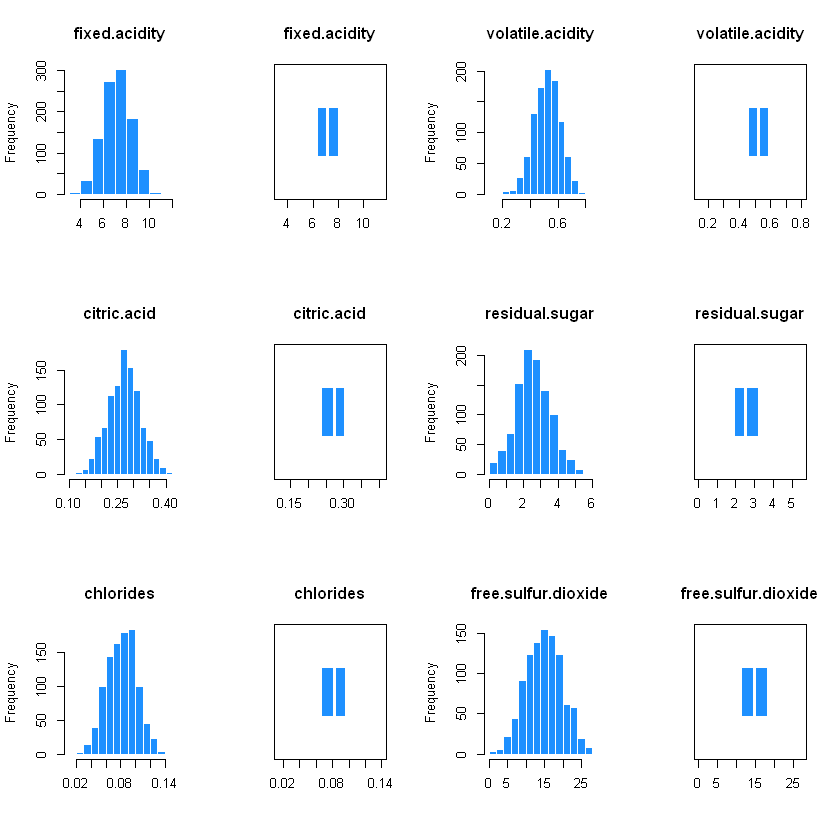

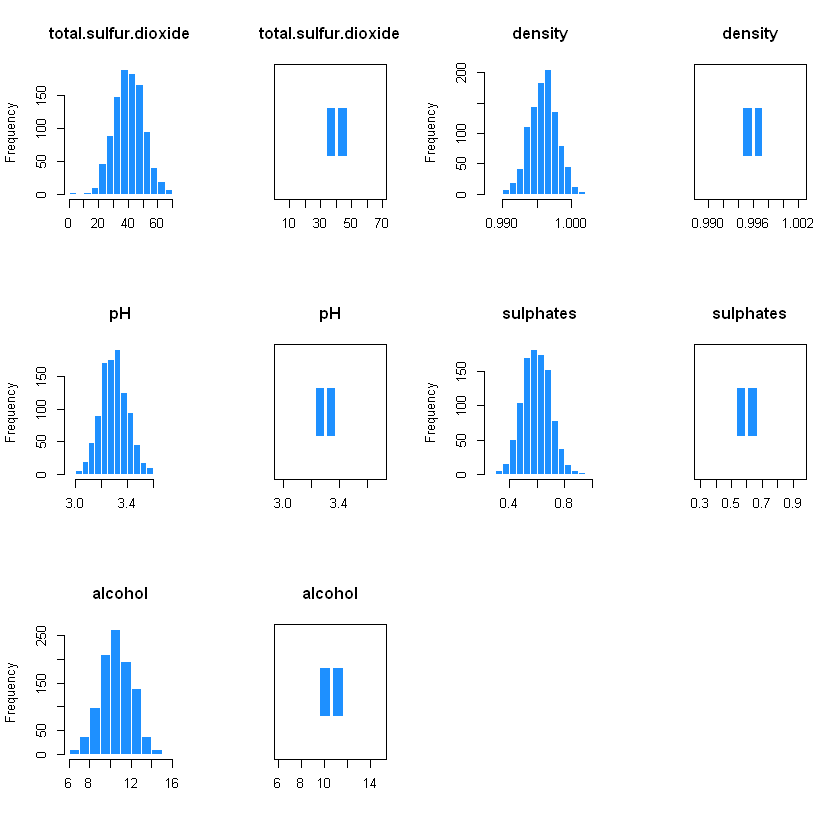

In [3]:
# Soal No.2

# Membuat visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik.
par(mfrow=c(3, 4))
for (i in 1:11) {
  hist(data_anggur[,i], main = colnames(data_anggur)[i], xlab = "", col = "dodgerblue", border = "white")
  boxplot(data_anggur[,i], main = colnames(data_anggur)[i], col = "dodgerblue", border = "white", horizontal = TRUE)
}

### Penjelasan No.2
<!--  ToDo  -->
1. Fixed Acidity
    * Histogram
    * Boxplot

___
## Soal No.3
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

### Normality Test
Normality test merupakan sebuah uji yang digunakan untuk menentukan apakah suatu data berdistribusi normal atau tidak. Ada beberapa metode yang dapat digunakan untuk melakukan normality test, beberapa di antara lainnya adalah
   1. Metode visual menggunakan histogram
   2. Metode visual menggunakan Q-Q diagram
   3. Uji Saphiro-Wilk
   4. Uji Kolmogorov-Smirnov Test
   
Dalam soal ini, kami akan menggunakan tiga dari empat normality test. Normality test yang akan digunakan adalah metode visual menggunakan histogram, Q-Q diagram, dan uji Saphiro-Wilk.

### Penjelasan Singkat Metode Uji
   1. Metode visual menggunakan histogram
       * test
   2. Metode visual menggunakan Q-Q diagram
       * test
   3. Uji Saphiro-Wilk
       * test
   4. Metode Tambahan (PPT)
       * Melalui nilai skewness, jika nilai skewnessnya sekitar 0, maka suatu data berdistribusi dapat disebut normal.
       * Melalui nilai kurtosis, jika nilai kurtosisnya sekitar 3, maka suatu data berdistribut dapat disebut normal.

Sumber: https://www.statology.org/test-for-normality-in-r/

### 1. Metode visual menggunakan histogram

### 2. Metode visual menggunakan Q-Q diagram

### 3. Uji Saphiro-Wilk

In [24]:
for(i in 1:11) {
  significance_level <- 0.05
  test_result <- shapiro.test(data_anggur[, i])
  p_value <- test_result$p.value
  normality <- ifelse(p_value < significance_level, "TIDAK BERDISTRIBUSI NORMAL", "BERDISTRIBUSI NORMAL")
  print(paste(colnames(data_anggur)[i], "memiliki nilai p: ", p_value, "-> ", normality))
}

[1] "fixed.acidity memiliki nilai p:  0.893654329764391 ->  BERDISTRIBUSI NORMAL"
[1] "volatile.acidity memiliki nilai p:  0.0599136401748108 ->  BERDISTRIBUSI NORMAL"
[1] "citric.acid memiliki nilai p:  0.26490871156372 ->  BERDISTRIBUSI NORMAL"
[1] "residual.sugar memiliki nilai p:  0.0450040247047423 ->  TIDAK BERDISTRIBUSI NORMAL"
[1] "chlorides memiliki nilai p:  0.174533085456471 ->  BERDISTRIBUSI NORMAL"
[1] "free.sulfur.dioxide memiliki nilai p:  0.0424727913162784 ->  TIDAK BERDISTRIBUSI NORMAL"
[1] "total.sulfur.dioxide memiliki nilai p:  0.536674267379383 ->  BERDISTRIBUSI NORMAL"
[1] "density memiliki nilai p:  0.853278136103308 ->  BERDISTRIBUSI NORMAL"
[1] "pH memiliki nilai p:  0.137307648356189 ->  BERDISTRIBUSI NORMAL"
[1] "sulphates memiliki nilai p:  0.112339293750436 ->  BERDISTRIBUSI NORMAL"
[1] "alcohol memiliki nilai p:  0.519145108391523 ->  BERDISTRIBUSI NORMAL"


### 4. Metode Tambahan (Nilai Skewness dan Kurtosis)

___
## Soal No.4
Melakukan test hipotesis 1 sampel,
   1. Nilai rata-rata pH di atas 3.29?
   2. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
   3. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
   4. Nilai rata-rata total sulfur dioxide di bawah 35?
   5. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

___
## Soal No.5
Melakukan test hipotesis 2 sampel,
   1. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
   2. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
   3. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?
   4. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
   5. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?
